In [1]:
!pip install nb_black
%load_ext nb_black

  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5280 sha256=d550f6800ad0d4ea35ff3406a6e42866c77c0cfdf9ba369574f94b88afd3e6bb
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt


/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv(
    "/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv",
    index_col="enrollee_id",
)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


<IPython.core.display.Javascript object>

In [6]:
df.nunique() / len(df)

city                      0.006420
city_development_index    0.004854
gender                    0.000157
relevent_experience       0.000104
enrolled_university       0.000157
education_level           0.000261
major_discipline          0.000313
experience                0.001148
company_size              0.000418
company_type              0.000313
last_new_job              0.000313
training_hours            0.012580
target                    0.000104
dtype: float64

<IPython.core.display.Javascript object>

In [7]:
obj_cols = df.select_dtypes("object").columns
df[obj_cols].nunique()

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
for col in obj_cols:
    print(col, df[col].unique())

city ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

<IPython.core.display.Javascript object>

In [9]:
df["enrolled_university"] = pd.Categorical(
    df["enrolled_university"],
    categories=["no_enrollment", "Part time course", "Full time course"],
    ordered=True,
)

<IPython.core.display.Javascript object>

In [10]:
df["education_level"] = pd.Categorical(
    df["education_level"],
    categories=["Primary School", "High School", "Masters", "Graduate"],
    ordered=True,
)

<IPython.core.display.Javascript object>

In [11]:
df["experience"] = pd.Categorical(
    df["experience"],
    categories=[
        "<1",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
        "10",
        "11",
        "12",
        "13",
        "14",
        "15",
        "16",
        "17",
        "18",
        "19",
        "20",
        ">20",
    ],
    ordered=True,
)

<IPython.core.display.Javascript object>

In [12]:
df["company_size"] = pd.Categorical(
    df["company_size"],
    categories=[
        "<10",
        "10/49",
        "50-99",
        "100-500",
        "500-999",
        "1000-4999",
        "5000-9999",
        "10000+",
    ],
    ordered=True,
)

<IPython.core.display.Javascript object>

In [13]:
df["last_new_job"] = pd.Categorical(
    df["last_new_job"], categories=["never", "1", "2", "3", "4", ">4"], ordered=True,
)

<IPython.core.display.Javascript object>

In [14]:
obj_cols = df.select_dtypes("object").columns
df[obj_cols] = df[obj_cols].astype("category")

<IPython.core.display.Javascript object>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   city                    19158 non-null  category
 1   city_development_index  19158 non-null  float64 
 2   gender                  14650 non-null  category
 3   relevent_experience     19158 non-null  category
 4   enrolled_university     18772 non-null  category
 5   education_level         18284 non-null  category
 6   major_discipline        16345 non-null  category
 7   experience              19093 non-null  category
 8   company_size            13220 non-null  category
 9   company_type            13018 non-null  category
 10  last_new_job            18735 non-null  category
 11  training_hours          19158 non-null  int64   
 12  target                  19158 non-null  float64 
dtypes: category(10), float64(2), int64(1)
memory usage: 794.0 KB


<IPython.core.display.Javascript object>

In [16]:
y = df["target"]
X = df.drop("target", axis=1)

<IPython.core.display.Javascript object>

In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [18]:
Xt, Xv, yt, yv = train_test_split(X, y, random_state=0)
dt = lgb.Dataset(Xt, yt)
dv = lgb.Dataset(Xv, yv)

<IPython.core.display.Javascript object>

In [19]:
import seaborn as sns

<IPython.core.display.Javascript object>

In [20]:
def loguniform(low=0, high=1, size=None, base=10):
    return np.power(base, np.random.uniform(low, high, size))

<IPython.core.display.Javascript object>

In [21]:
best_etas = {"eta": [], "score": []}

<IPython.core.display.Javascript object>

Good learning rate: 0.008113596969684878


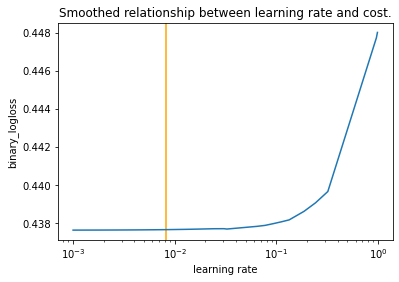

<IPython.core.display.Javascript object>

In [22]:
metric = "binary_logloss"
for _ in range(30):
    eta = loguniform(-3, 0)
    best_etas["eta"].append(eta)
    model = lgb.train(
        {"objective": "binary", "eta": eta},
        dt,
        num_boost_round=10000,
        valid_sets=[dt, dv],
        valid_names=["training", "valid"],
        early_stopping_rounds=50,
        verbose_eval=False,
    )
    best_etas["score"].append(model.best_score["valid"][metric])

best_eta_df = pd.DataFrame.from_dict(best_etas)
lowess_data = lowess(best_eta_df["score"], best_eta_df["eta"],)

plt.xscale("log")
rounded_data = lowess_data.copy()
rounded_data[:, 1] = rounded_data[:, 1].round(4)
rounded_data = rounded_data[::-1]  # reverse to find first minimum
good_enough_eta = rounded_data[rounded_data[:, 1].argmin(), 0]

# plot relationship between learning rate and performance, with its corresponding optimal eta
print(f"Good learning rate: {good_enough_eta}")
plt.axvline(good_enough_eta, color="orange")
plt.title("Smoothed relationship between learning rate and cost.")
plt.xlabel("learning rate")
plt.ylabel(metric)
sns.lineplot(lowess_data[:, 0], lowess_data[:, 1])

In [23]:
model = lgb.train(
    {"objective": "binary", "eta": good_enough_eta},
    dt,
    num_boost_round=10000,
    valid_sets=[dt, dv],
    valid_names=["training", "valid"],
    early_stopping_rounds=50,
    verbose_eval=100,
)

Training until validation scores don't improve for 50 rounds
[100]	training's binary_logloss: 0.451664	valid's binary_logloss: 0.462869
[200]	training's binary_logloss: 0.420908	valid's binary_logloss: 0.44198
[300]	training's binary_logloss: 0.407904	valid's binary_logloss: 0.438278
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.404114	valid's binary_logloss: 0.438134


<IPython.core.display.Javascript object>

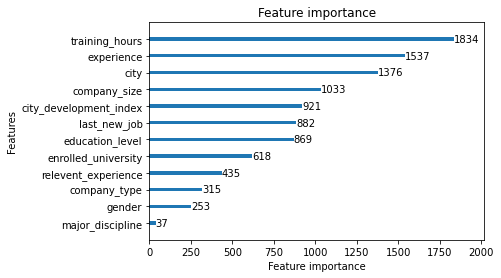

<IPython.core.display.Javascript object>

In [24]:
lgb.plot_importance(model, grid=False)

In [25]:
threshold = 0.75
corr = Xt.corr(method="kendall")
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper = upper.stack()
high_upper = upper[(abs(upper) > threshold)]
abs_high_upper = abs(high_upper).sort_values(ascending=False)
pairs = abs_high_upper.index.to_list()
print(f"Correlated features: {pairs if len(pairs) > 0 else None}")

Correlated features: None


<IPython.core.display.Javascript object>

In [26]:
sorted_features = [
    feature
    for _, feature in sorted(
        zip(model.feature_importance(), dt.feature_name), reverse=False
    )
]

best_score = model.best_score["valid"][metric]
print(f"starting score: {best_score:.4f}")
drop_unimportant_features = []
for feature in sorted_features:
    drop_unimportant_features.append(feature)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X.drop(drop_unimportant_features, axis=1), y, random_state=0
    )
    dt = lgb.Dataset(X_train, y_train)
    dv = lgb.Dataset(X_valid, y_valid)
    drop_model = lgb.train(
        {"objective": "binary", "metric": metric, "eta": good_enough_eta},
        dt,
        valid_sets=[dt, dv],
        valid_names=["training", "valid"],
        num_boost_round=10000,
        early_stopping_rounds=50,
        verbose_eval=False,
    )
    score = drop_model.best_score["valid"][metric]
    if score > best_score:
        del drop_unimportant_features[-1]  # remove from drop list
        print(f"Dropping {feature} worsened score to {score:.4f}.")
        break
    else:
        best_score = score
print(f"ending score: {best_score:.4f}")
print(
    f"dropped features: {drop_unimportant_features if len(drop_unimportant_features) > 0 else None}"
)

starting score: 0.4381
Dropping gender worsened score to 0.4381.
ending score: 0.4380
dropped features: ['major_discipline']


<IPython.core.display.Javascript object>

In [27]:
X = X.drop(drop_unimportant_features, axis=1)
Xt, Xv, yt, yv = train_test_split(X, y, random_state=0)
dt = lgb.Dataset(Xt, yt)
dv = lgb.Dataset(Xv, yv)

<IPython.core.display.Javascript object>

In [28]:
import optuna.integration.lightgbm as lgb

params = {
    "objective": "binary",
    "metric": metric,
    "verbosity": -1,
    "boosting_type": "gbdt",
    "eta": good_enough_eta,
}

dt = lgb.Dataset(Xt, yt)
dv = lgb.Dataset(Xv, yv)


model = lgb.train(
    params,
    dt,
    valid_sets=[dt, dv],
    valid_names=["training", "valid"],
    num_boost_round=10000,
    verbose_eval=False,
    early_stopping_rounds=50,
)

score = model.best_score["valid"][metric]

best_params = model.params
print("Best params:", best_params)
print(f"  {metric} = {score}")
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

[I 2020-12-30 21:09:09,042] A new study created in memory with name: no-name-5db85ac2-b78c-4390-b46c-b8f51757fe2e
min_data_in_leaf, val_score: 0.436803: 100%|##########| 5/5 [00:07<00:00,  1.55s/it]

Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'learning_rate': 0.008113596969684878, 'lambda_l1': 1.2533187872854186e-08, 'lambda_l2': 3.7087705109483286e-08, 'num_leaves': 28, 'feature_fraction': 0.6, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20}
  binary_logloss = 0.4368030577462987
  Params: 
    objective: binary
    metric: binary_logloss
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    learning_rate: 0.008113596969684878
    lambda_l1: 1.2533187872854186e-08
    lambda_l2: 3.7087705109483286e-08
    num_leaves: 28
    feature_fraction: 0.6
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20


<IPython.core.display.Javascript object>

In [29]:
import lightgbm as lgb

<IPython.core.display.Javascript object>

In [30]:
best_params["eta"] = good_enough_eta

<IPython.core.display.Javascript object>

In [31]:
model = lgb.train(
    best_params,
    dt,
    num_boost_round=10000,
    valid_sets=[dt, dv],
    valid_names=["training", "valid"],
    early_stopping_rounds=50,
    verbose_eval=100,
)

Training until validation scores don't improve for 50 rounds
[100]	training's binary_logloss: 0.459326	valid's binary_logloss: 0.468548
[200]	training's binary_logloss: 0.427578	valid's binary_logloss: 0.444848
[300]	training's binary_logloss: 0.41366	valid's binary_logloss: 0.438061
[400]	training's binary_logloss: 0.405122	valid's binary_logloss: 0.436891
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.405998	valid's binary_logloss: 0.436803


<IPython.core.display.Javascript object>

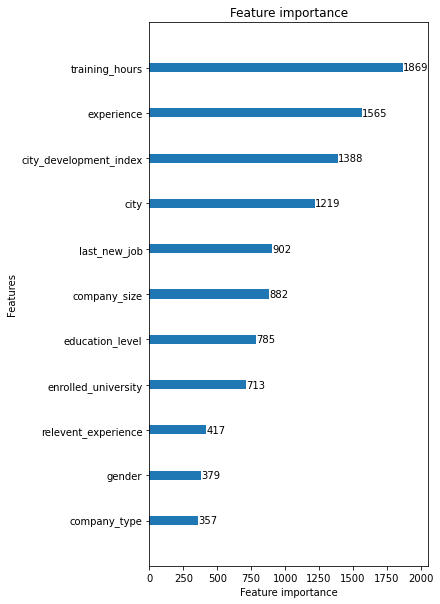

<IPython.core.display.Javascript object>

In [32]:
lgb.plot_importance(model, grid=False, figsize=(5, 10))

In [33]:
from sklearn.metrics import roc_auc_score, classification_report

<IPython.core.display.Javascript object>

In [34]:
ypred = model.predict(Xv, num_iteration=model.best_iteration)
print(f"AUC: {roc_auc_score(yv, ypred):.4f}")

AUC: 0.8023


<IPython.core.display.Javascript object>

In [35]:
import shap

<IPython.core.display.Javascript object>

In [36]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xv)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


<IPython.core.display.Javascript object>

In [37]:
from category_encoders import OrdinalEncoder

<IPython.core.display.Javascript object>

In [38]:
Xv_enc = OrdinalEncoder().fit_transform(Xv)

<IPython.core.display.Javascript object>

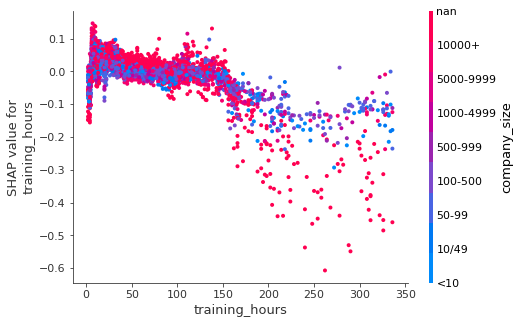

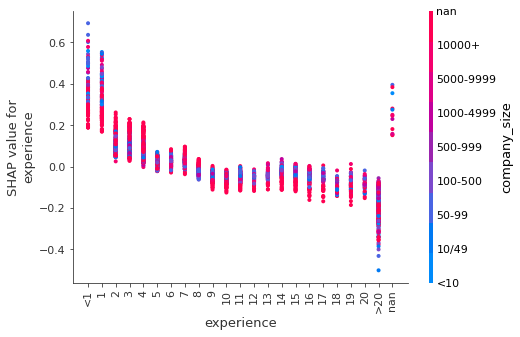

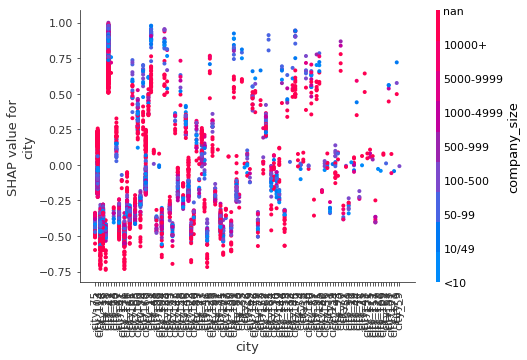

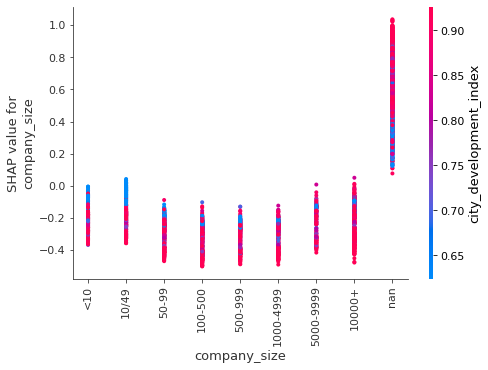

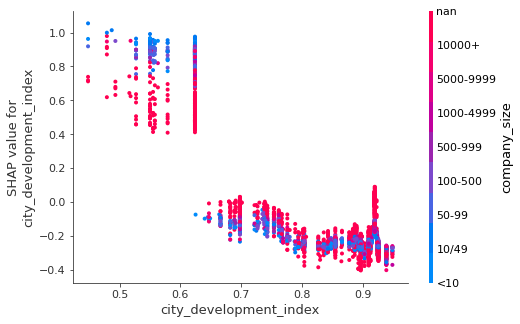

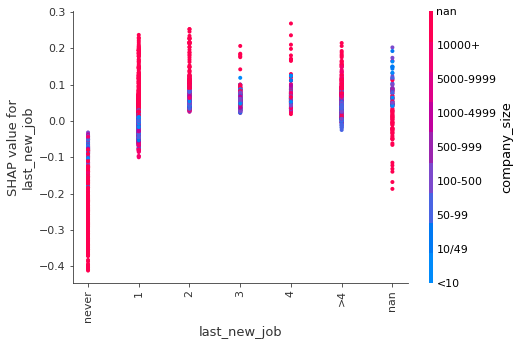

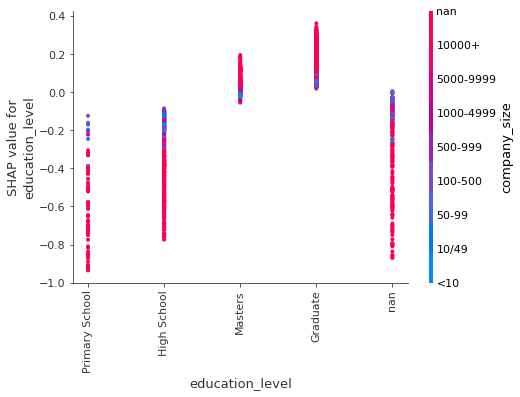

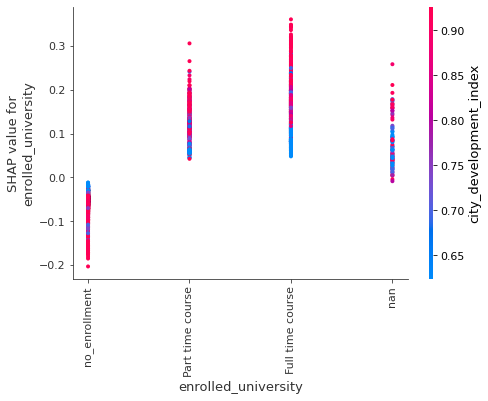

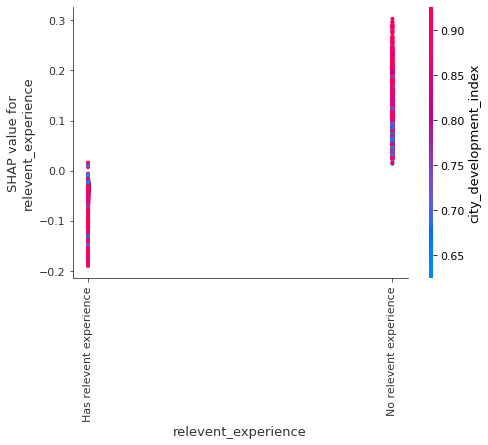

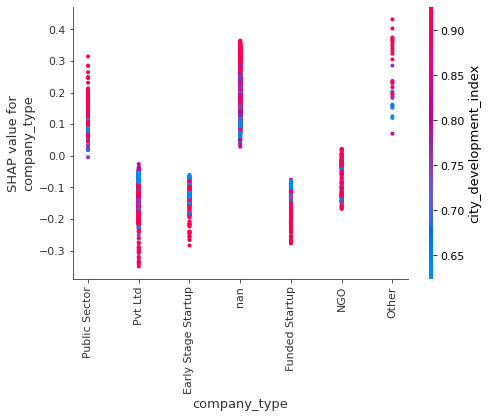

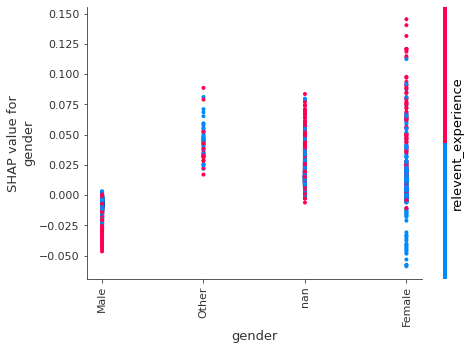

ValueError: Could not find feature named: major_discipline

<IPython.core.display.Javascript object>

In [39]:
for name in reversed(sorted_features):
    shap.dependence_plot(name, shap_values[1], Xv_enc, display_features=Xv)

In [40]:
def preprocess_test(df, drop_unimportant_features):
    df = df.copy()

    df["enrolled_university"] = pd.Categorical(
        df["enrolled_university"],
        categories=["no_enrollment", "Part time course", "Full time course"],
        ordered=True,
    )

    df["education_level"] = pd.Categorical(
        df["education_level"],
        categories=["Primary School", "High School", "Masters", "Graduate"],
        ordered=True,
    )

    df["experience"] = pd.Categorical(
        df["experience"],
        categories=[
            "<1",
            "1",
            "2",
            "3",
            "4",
            "5",
            "6",
            "7",
            "8",
            "9",
            "10",
            "11",
            "12",
            "13",
            "14",
            "15",
            "16",
            "17",
            "18",
            "19",
            "20",
            ">20",
        ],
        ordered=True,
    )

    df["company_size"] = pd.Categorical(
        df["company_size"],
        categories=[
            "<10",
            "10/49",
            "50-99",
            "100-500",
            "500-999",
            "1000-4999",
            "5000-9999",
            "10000+",
        ],
        ordered=True,
    )

    df["last_new_job"] = pd.Categorical(
        df["last_new_job"],
        categories=["never", "1", "2", "3", "4", ">4"],
        ordered=True,
    )

    obj_cols = df.select_dtypes("object").columns
    df[obj_cols] = df[obj_cols].astype("category")

    X = df.drop(drop_unimportant_features, axis=1)
    return X

<IPython.core.display.Javascript object>

In [41]:
df_test = pd.read_csv(
    "/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv",
    index_col="enrollee_id",
)

<IPython.core.display.Javascript object>

In [42]:
X_test = preprocess_test(df_test, drop_unimportant_features)

<IPython.core.display.Javascript object>

In [43]:
ypred_test = model.predict(X_test, num_iteration=model.best_iteration)

<IPython.core.display.Javascript object>

In [44]:
submission = pd.Series(ypred_test, X_test.index)

<IPython.core.display.Javascript object>